#The Dataset
The dataset is composed of 44 columns and 58592 observations. There are 16 numerical variables
and 28 categorical ones, and as we can see some of the latter are already encoded in a numerical fashion.

The table below represents an overview of our dataset. The categorical variable ‘is_claim’, is our response variable on which our analysis will be based on. It is composed by two levels [
Yes(1), No(0) ]. It turns out that this variable is quite unbalanced (93.6% - No , 6.4% - Yes).  

It's natural,
in case of an unbalanced categorical variable, the level of interest is mostly focused on the minority
one.As for the insurance companies are highly interested in unveiling the reasons behind what kind of people will chose to file a claim.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
dt = pd.read_csv(r"C:\Users\varun\Desktop\PRODIGY\Prodigy T2\train.csv")

dt.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [20]:
#Droping policy_id because its just a policy number not significant
dt = dt.drop(columns=['policy_id'])

In [21]:
dt = dt.drop(columns=['area_cluster'])

In [22]:
dt.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [23]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   population_density                58592 non-null  int64  
 4   make                              58592 non-null  int64  
 5   segment                           58592 non-null  object 
 6   model                             58592 non-null  object 
 7   fuel_type                         58592 non-null  object 
 8   max_torque                        58592 non-null  object 
 9   max_power                         58592 non-null  object 
 10  engine_type                       58592 non-null  object 
 11  airbags                           58592 non-null  int64  
 12  is_e

In [24]:
# we have to chek if there are missing values
missing_values = dt.isnull().sum()

print("missing values for each column:")
print(missing_values)

if missing_values.sum() == 0:
    print("There aren't missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

missing values for each column:
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width             

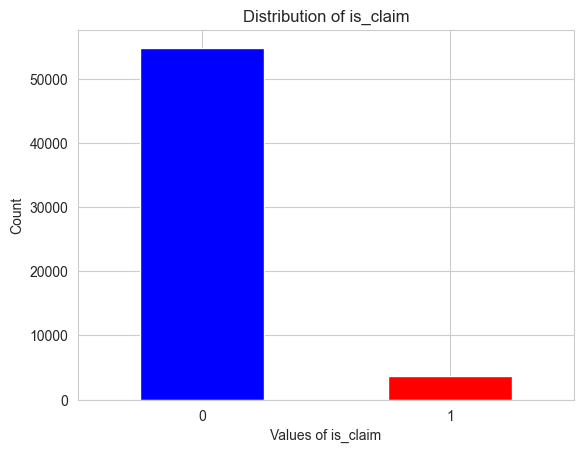

In [25]:
# Compute ho many 0 and 1 there are in is_claim
conteggio = dt['is_claim'].value_counts()

# we create a bar plot to visualize the results
colors = ['blue' if (x == 0) else 'red' for x in conteggio.index]
conteggio.plot(kind='bar', color=colors)
plt.title('Distribution of is_claim')
plt.xlabel('Values of is_claim')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'], rotation=0)

plt.show()

We can see that our target variable has an imbalanced distribution.

In [26]:
columns=dt.columns
numerical,categorical=0,0
num_list, cat_list=[], []
for i in columns:
  if pd.api.types.is_numeric_dtype(dt[i]):
    print(f"the variable  '{i}' is numerical.")
    numerical=numerical+ 1
    num_list.append(i)
  else:
    print(f"the variable '{i}' is categorical.")
    categorical=categorical + 1
    cat_list.append(i)
print(f'the numerical variables are {numerical}')
print(f'the categorical variables are {categorical}')
print(num_list)
print(cat_list)

the variable  'policy_tenure' is numerical.
the variable  'age_of_car' is numerical.
the variable  'age_of_policyholder' is numerical.
the variable  'population_density' is numerical.
the variable  'make' is numerical.
the variable 'segment' is categorical.
the variable 'model' is categorical.
the variable 'fuel_type' is categorical.
the variable 'max_torque' is categorical.
the variable 'max_power' is categorical.
the variable 'engine_type' is categorical.
the variable  'airbags' is numerical.
the variable 'is_esc' is categorical.
the variable 'is_adjustable_steering' is categorical.
the variable 'is_tpms' is categorical.
the variable 'is_parking_sensors' is categorical.
the variable 'is_parking_camera' is categorical.
the variable 'rear_brakes_type' is categorical.
the variable  'displacement' is numerical.
the variable  'cylinder' is numerical.
the variable 'transmission_type' is categorical.
the variable  'gear_box' is numerical.
the variable 'steering_type' is categorical.
the var

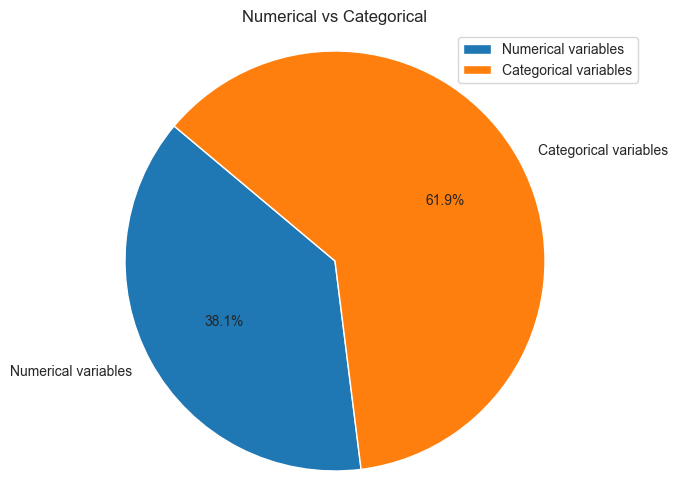

In [27]:
etichette = ['Numerical variables', 'Categorical variables']

plt.figure(figsize=(8, 6))
plt.pie([numerical, categorical], labels=etichette, autopct='%1.1f%%', startangle=140)
plt.title('Numerical vs Categorical')
plt.axis('equal')
plt.legend(etichette, loc="best")
plt.show()

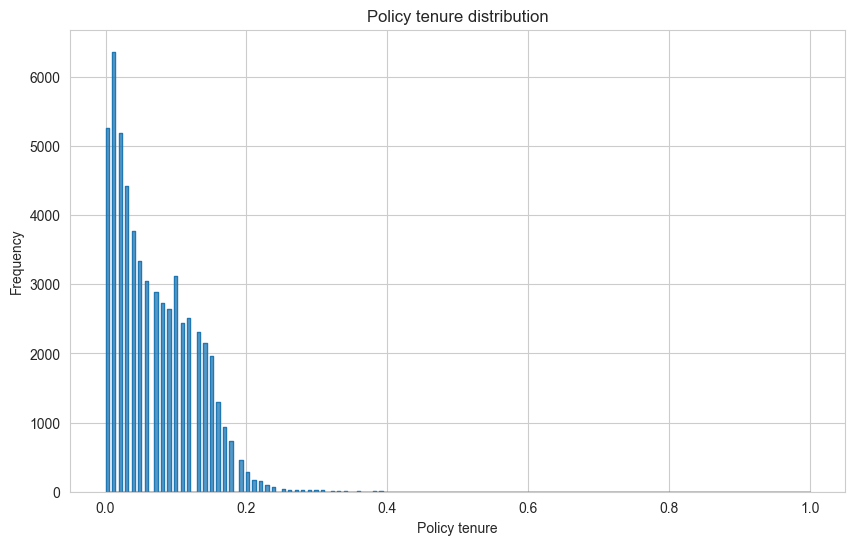

In [28]:
# POLICY TENURE DISTRIBUTION
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the style is consistent
sns.set_style("whitegrid")

# Plotting distribution of 'age_of_car' by 'is_claim'
plt.figure(figsize=(10, 6))
sns.histplot(data=dt, x="age_of_car", element="step", common_norm=False)
plt.title('Policy tenure distribution')
plt.xlabel('Policy tenure')
plt.ylabel('Frequency')

plt.show()

The histogram shows a distribution with a pronounced positive skewness (or right skew), evident from the fact that the tail of the distribution extends much further towards higher values of "Policy tenure." This indicates that a significant amount of data points towards the left side of the histogram, with low values, and that there are relatively few cases with high values.


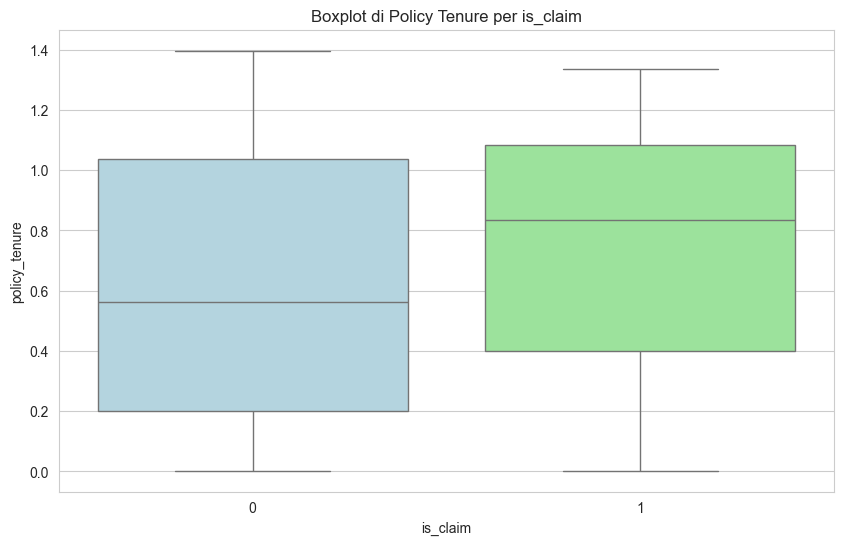

In [29]:
#3 BOX PLOT POLICY TENURE FOR IS CLAIM 0 AND IS CLAIM 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_claim', y='policy_tenure', data=dt, hue='is_claim', palette=['lightblue', 'lightgreen'], legend=False)
plt.title('Boxplot di Policy Tenure per is_claim')
plt.show()


The boxplot itself does not directly imply causality or directionality; it simply shows the distribution of policy tenure for two different groups: those with claims and those without. However, your observation about the median differences being substantial in the context of the range is important.

Indeed, if the median policy tenure for policies with a claim ('1') is significantly higher than for those without a claim ('0'), and considering the range of the data is between 0 and 1.2, a difference of over 0.2 could be considered significant. This might suggest that policies with a longer tenure are more likely to have a claim.

However, to confirm whether the difference is statistically significant, and not just visually apparent, an appropriate statistical test such as a Mann-Whitney U test (if the data is not normally distributed) or an independent samples t-test (if the data is normally distributed) would need to be conducted. This would provide more conclusive evidence on whether the policy tenure length is associated with the likelihood of a claim being made.

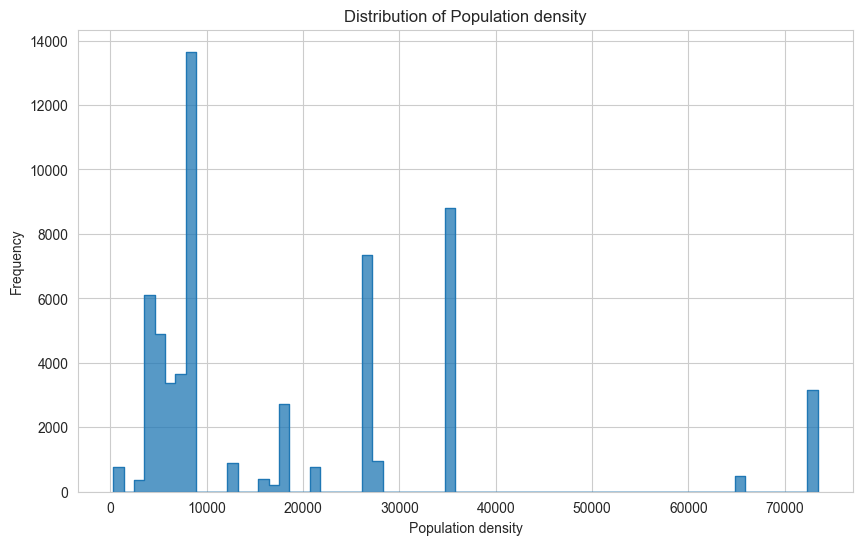

In [30]:
# POPULATION DENSITY
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the style is consistent
sns.set_style("whitegrid")

# Plotting distribution of 'age_of_car' by 'is_claim'
plt.figure(figsize=(10, 6))
sns.histplot(data=dt, x="population_density", element="step", common_norm=False)
plt.title('Distribution of Population density')
plt.xlabel('Population density')
plt.ylabel('Frequency')
plt.show()

Multimodal Distribution: The histogram exhibits a multimodal distribution with several distinct peaks. This suggests that there are several 'popular' population densities at which a higher number of regions/entities are concentrated.

Right-Skewed (Positive Skewness): There is a long right tail, indicating that while most regions/entities have a lower population density, there are a few areas with very high population density.

Outliers: The bins at the far right of the histogram, especially the one just before 70,000, appear to contain fewer regions/entities and are separate from the others. These could represent outliers, which are regions with unusually high population densities compared to the rest.



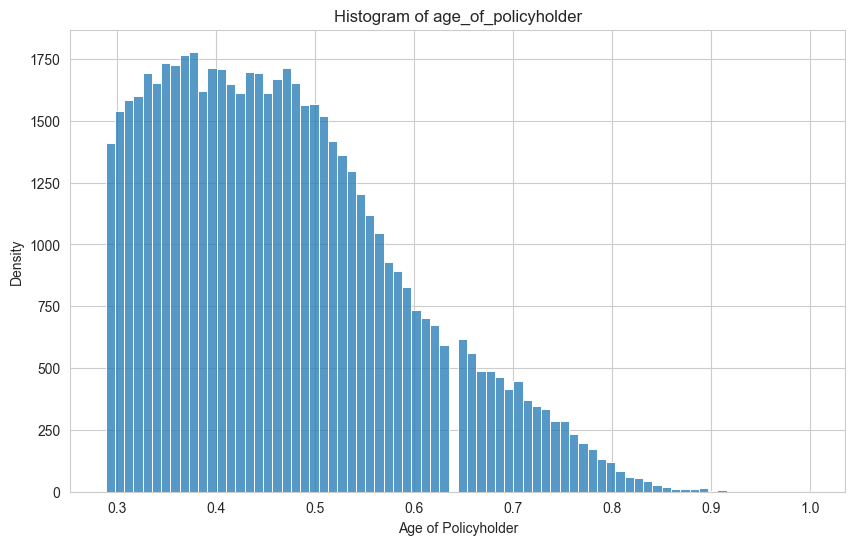

In [31]:
#histogram for age_of_policyholder
plt.figure(figsize=(10, 6))
sns.histplot(data=dt, x="age_of_policyholder", common_norm=False)
plt.title('Histogram of age_of_policyholder')
plt.xlabel('Age of Policyholder')
plt.ylabel('Density')
plt.show()

The distribution shown in the histogram represents the distribution of values for the variable 'Age'. It can be observed that the distribution is approximately symmetric, with a slight right-skew. This suggests that the majority of ages are concentrated towards the lower end of the scale, with a decreasing number of individuals as age increases.

The distribution appears to approximate a normal (bell-shaped) distribution, although it exhibits slight asymmetry. This may suggest that age follows a normal distribution pattern, but with a slight deviation from perfect symmetry.

In summary, the histogram suggests an approximately normal distribution of ages, with most data concentrated within a relatively narrow range, but with considerable variation across the entire range of ages represented.

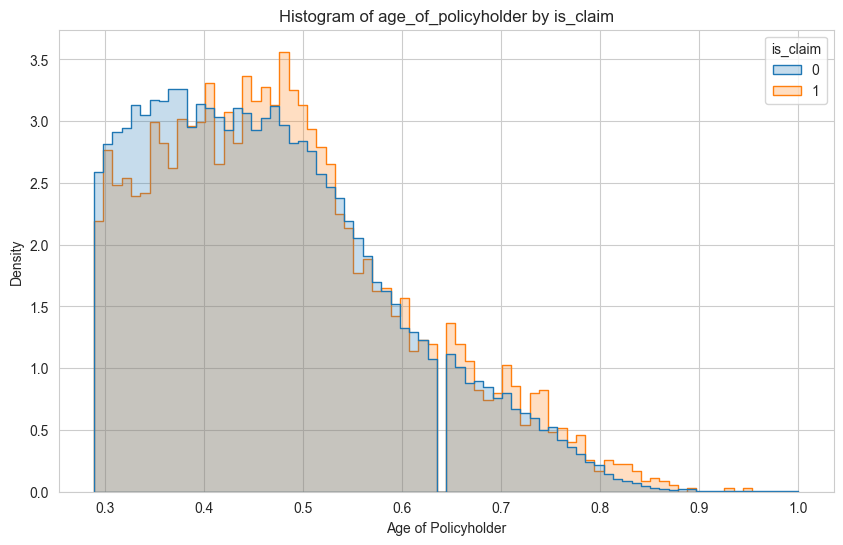

In [32]:
#histogram for age_of_policyholder for is claim
plt.figure(figsize=(10, 6))
sns.histplot(data=dt, x="age_of_policyholder", hue="is_claim", element="step", stat="density", common_norm=False)
plt.title('Histogram of age_of_policyholder by is_claim')
plt.xlabel('Age of Policyholder')
plt.ylabel('Density')
plt.show()

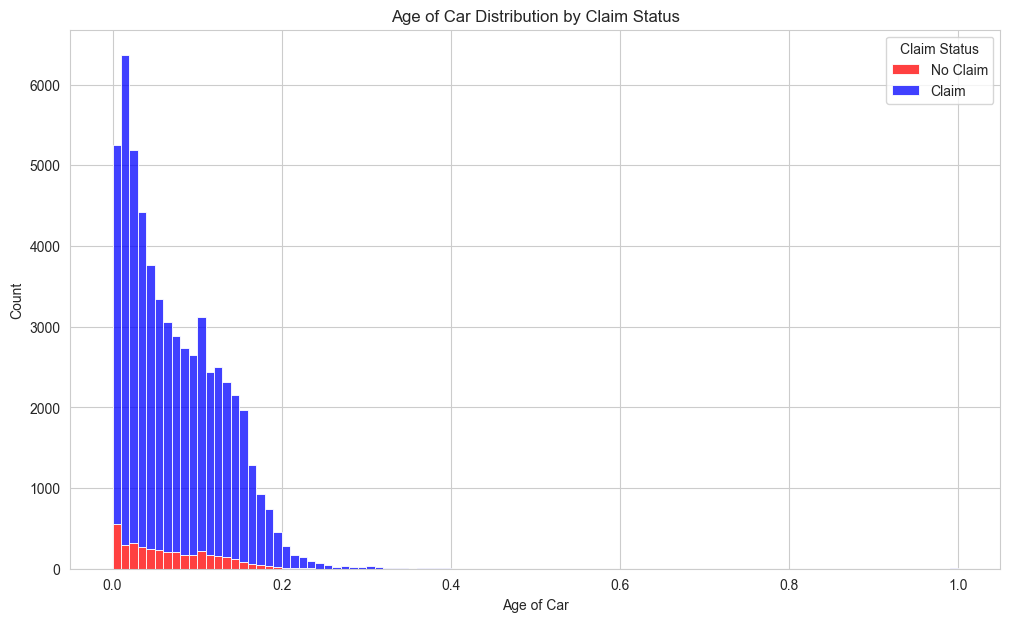

In [33]:



plt.figure(figsize=(12, 7))
sns.histplot(data=dt, x='age_of_car', hue='is_claim', multiple='stack', binwidth=0.01, palette={0: 'blue', 1: 'red'})
plt.title('Age of Car Distribution by Claim Status')
plt.xlabel('Age of Car')
plt.ylabel('Count')
plt.legend(title='Claim Status', labels=['No Claim', 'Claim'])
plt.show()


The red bars are more prominent in the initial range, which could indicate that newer cars have a slight tendency to require compensation, but this trend decreases rapidly with the age of the car. This could be due to several factors. One possible interpretation is that owners of older cars may also have lower insurance coverage compared to newer vehicles.

In [34]:
from scipy.stats import chi2_contingency
for var in cat_list:
    crosstab = pd.crosstab(dt[var], dt['is_claim'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f'Test Chi-quadrato {var}: Chi2 = {round(chi2,2)}, p-value = {(p)}')

Test Chi-quadrato segment: Chi2 = 12.6, p-value = 0.02738747673628079
Test Chi-quadrato model: Chi2 = 19.97, p-value = 0.02949022219663932
Test Chi-quadrato fuel_type: Chi2 = 5.76, p-value = 0.056145343695656484
Test Chi-quadrato max_torque: Chi2 = 19.39, p-value = 0.012915422090714527
Test Chi-quadrato max_power: Chi2 = 19.39, p-value = 0.012915422090714527
Test Chi-quadrato engine_type: Chi2 = 19.97, p-value = 0.029490222196639326
Test Chi-quadrato is_esc: Chi2 = 0.5, p-value = 0.47973082296004166
Test Chi-quadrato is_adjustable_steering: Chi2 = 11.23, p-value = 0.0008041954126638532
Test Chi-quadrato is_tpms: Chi2 = 0.02, p-value = 0.8804734284234931
Test Chi-quadrato is_parking_sensors: Chi2 = 3.98, p-value = 0.046026600078480424
Test Chi-quadrato is_parking_camera: Chi2 = 0.04, p-value = 0.8464941782641769
Test Chi-quadrato rear_brakes_type: Chi2 = 0.02, p-value = 0.8804734284234931
Test Chi-quadrato transmission_type: Chi2 = 0.02, p-value = 0.8913806451098147
Test Chi-quadrato st

The chi-square test evaluates whether there is an association between the categories of the two variables. In this case, you can use it to determine if there is a significant association between the predictor categorical variable and the binary response variable.

Here's how you can use the chi-square test:

Formulation of hypotheses: The null hypothesis (H0) states that there is no association between the two variables, while the alternative hypothesis (H1) states that there is an association between the two variables.

Calculation of chi-square: Calculate the chi-square value using the contingency table that shows the observed frequencies of combinations between the categories of the two variables.

Determination of significance level: Choose a significance level (alpha) for the test, commonly set at 0.05.

Decision: Compare the calculated chi-square value with the critical chi-square value for your chosen significance level and appropriate degrees of freedom. If the calculated value is greater than the critical value, you can reject the null hypothesis and conclude that there is a significant association between the two variables.

Interpretation: If you reject the null hypothesis, it means that the two variables are significantly associated. You can further examine the nature of this association, such as by calculating the proportions of the categories of the binary response variable within the categories of the predictor categorical variable.

The chi-square test is a powerful and widely used tool for assessing the association between categorical variables and can be particularly useful when trying to understand the relationship between a categorical predictor variable and a binary response variable.
Remark: Is a symmetric coefficient because the varibles playing the same rules , there is not a target variable

In [35]:

# To undestrand wich variables we could remove without loss in terms of information, deleting the variables with a p_value > 0,05
variables_to_delete,imp_cat_var = [],[]
cat_var_del, num_imp_cat=0,0
for var in cat_list:
    crosstab = pd.crosstab(dt[var], dt['is_claim'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    if p > 0.05:
        variables_to_delete.append(var)
        cat_var_del=cat_var_del+1
    else:
        imp_cat_var.append(var)
        num_imp_cat+=1
print(variables_to_delete)
print(cat_var_del)
print(imp_cat_var, num_imp_cat) #important_categorical_variable, number of important categorical variable

['fuel_type', 'is_esc', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
16
['segment', 'model', 'max_torque', 'max_power', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable'] 10


In [36]:
cat_list_copy = cat_list.copy()
for var in cat_list:
  if var in variables_to_delete:
    cat_list_copy.remove(var)

print(cat_list_copy)
print(len(cat_list_copy))

['segment', 'model', 'max_torque', 'max_power', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']
10


In [37]:
import seaborn as sns
# Test to analyze the correlation between numerical variables and binary response
import scipy.stats as stats

# We create a dictionary to ANOVA
anova_results = {}

# #we perform the Anova for each numerical variable
for var in num_list:
    gruppi = [dt[var][dt['is_claim'] == val] for val in dt['is_claim'].unique()]
    f_val, p_val = stats.f_oneway(*gruppi)
    anova_results[var] = {'F-Value': f_val, 'P-Value': p_val}

# we use a dataframe to visualize in the best way the results
anova_results_df = pd.DataFrame(anova_results).T

print(anova_results_df.sort_values(by='P-Value',ascending=False))

# Define the p-value threshold
p_value_threshold = 0.05

# Filter the DataFrame based on the threshold
significant_vars = anova_results_df[anova_results_df['P-Value'] <= p_value_threshold]

# List of variables with p-value <= threshold
significant_var_list = significant_vars.index.tolist()

print("Variables with p-value <= {}: {}".format(p_value_threshold, significant_var_list))



                        F-Value       P-Value
make                   0.012172  9.121488e-01
gear_box               0.023657  8.777616e-01
height                 0.239909  6.242738e-01
turning_radius         0.434823  5.096347e-01
airbags                0.455680  4.996527e-01
ncap_rating            0.846083  3.576665e-01
gross_weight           0.888611  3.458578e-01
length                 2.471373  1.159420e-01
displacement           3.454046  6.310216e-02
width                  5.797693  1.605028e-02
cylinder              10.575143  1.146832e-03
population_density    18.586944  1.625932e-05
age_of_policyholder   29.505774  5.597168e-08
age_of_car            46.537984  9.072911e-12
policy_tenure        365.593096  3.018116e-81
is_claim                    inf  0.000000e+00
Variables with p-value <= 0.05: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width', 'is_claim']


C:\Users\varun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


F-Value

The F-value is a test statistic calculated in an Analysis of Variance (ANOVA) test.
It measures the ratio of the variation between the means of different groups (explained by the model) to the variation within the groups (unexplained by the model).
A larger F-value suggests that there's a greater difference between group means relative to the variability within each group.

In [38]:
# Conversion of "make" variable, even if is composed of numbers, it represents different brands

num_list.remove("make")
cat_list.append("make")

# Conversion of ncap_raing variable to categorical

num_list.remove("ncap_rating")

cat_list.append("ncap_rating")

In [39]:
#t-test
import pandas as pd
import scipy.stats as stats
##
num_list_clean = []
# Esecuzione del t-test per ciascuna variabile numerica
for col in num_list:
    if col != 'is_claim':  # Escludere la variabile 'is_claim' stessa
        group1 = dt[dt['is_claim'] == 0][col]
        group2 = dt[dt['is_claim'] == 1][col]

        # Assicurati che entrambi i gruppi contengano dati
        if not group1.empty and not group2.empty:
            t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')

            # Create a numeric list with only significant values
            if p_val < 0.05:
              num_list_clean.append(col)

            print(f"T-test per {col}:")
            print(f"Statistiche T: {t_stat}, P-Value: {p_val}")
            print("\n")

T-test per policy_tenure:
Statistiche T: -19.120488897915184, P-Value: 3.0181155800813767e-81


T-test per age_of_car:
Statistiche T: 6.821875377326513, P-Value: 9.072910995000975e-12


T-test per age_of_policyholder:
Statistiche T: -5.431921755218786, P-Value: 5.597168406298442e-08


T-test per population_density:
Statistiche T: 4.311257788753685, P-Value: 1.625932428786587e-05


T-test per airbags:
Statistiche T: -0.6750405354369583, P-Value: 0.4996526755376429


T-test per displacement:
Statistiche T: -1.8585063217973412, P-Value: 0.06310215766252036


T-test per cylinder:
Statistiche T: -3.2519444875163233, P-Value: 0.0011468318451899853


T-test per gear_box:
Statistiche T: 0.15380803281290736, P-Value: 0.8777616296673278


T-test per turning_radius:
Statistiche T: -0.6594107220481331, P-Value: 0.5096346505223106


T-test per length:
Statistiche T: -1.572060185300122, P-Value: 0.11594199374360714


T-test per width:
Statistiche T: -2.407839933146624, P-Value: 0.01605028483903441




* **Highly Significant Variables (p-value < 0.05):**
    * policy_tenure (Negative relationship)
    * age_of_car (Positive relationship)
    * age_of_policyholder (Negative relationship)
    * population_density (Positive relationship)
    * cylinder (Negative relationship)
    * width (Negative relationship)

* **Variables with Borderline Significance (p-value near to 0.05):**
    * displacement  (relazione negativa)

* **Non-Significant Variables (p-value > 0.05):**
    * airbags
    * gear_box
    * turning_radius
    * length
    * height
    * gross_weight

T-statistic

The T-statistic measures the size of the difference between the group means relative to the variation within each group.
A larger absolute value of the T-statistic indicates a greater difference between the means.
A positive T-statistic suggests that the mean of one group is higher than the other, while a negative T-statistic suggests the opposite.

In [40]:
print(num_list_clean)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width']


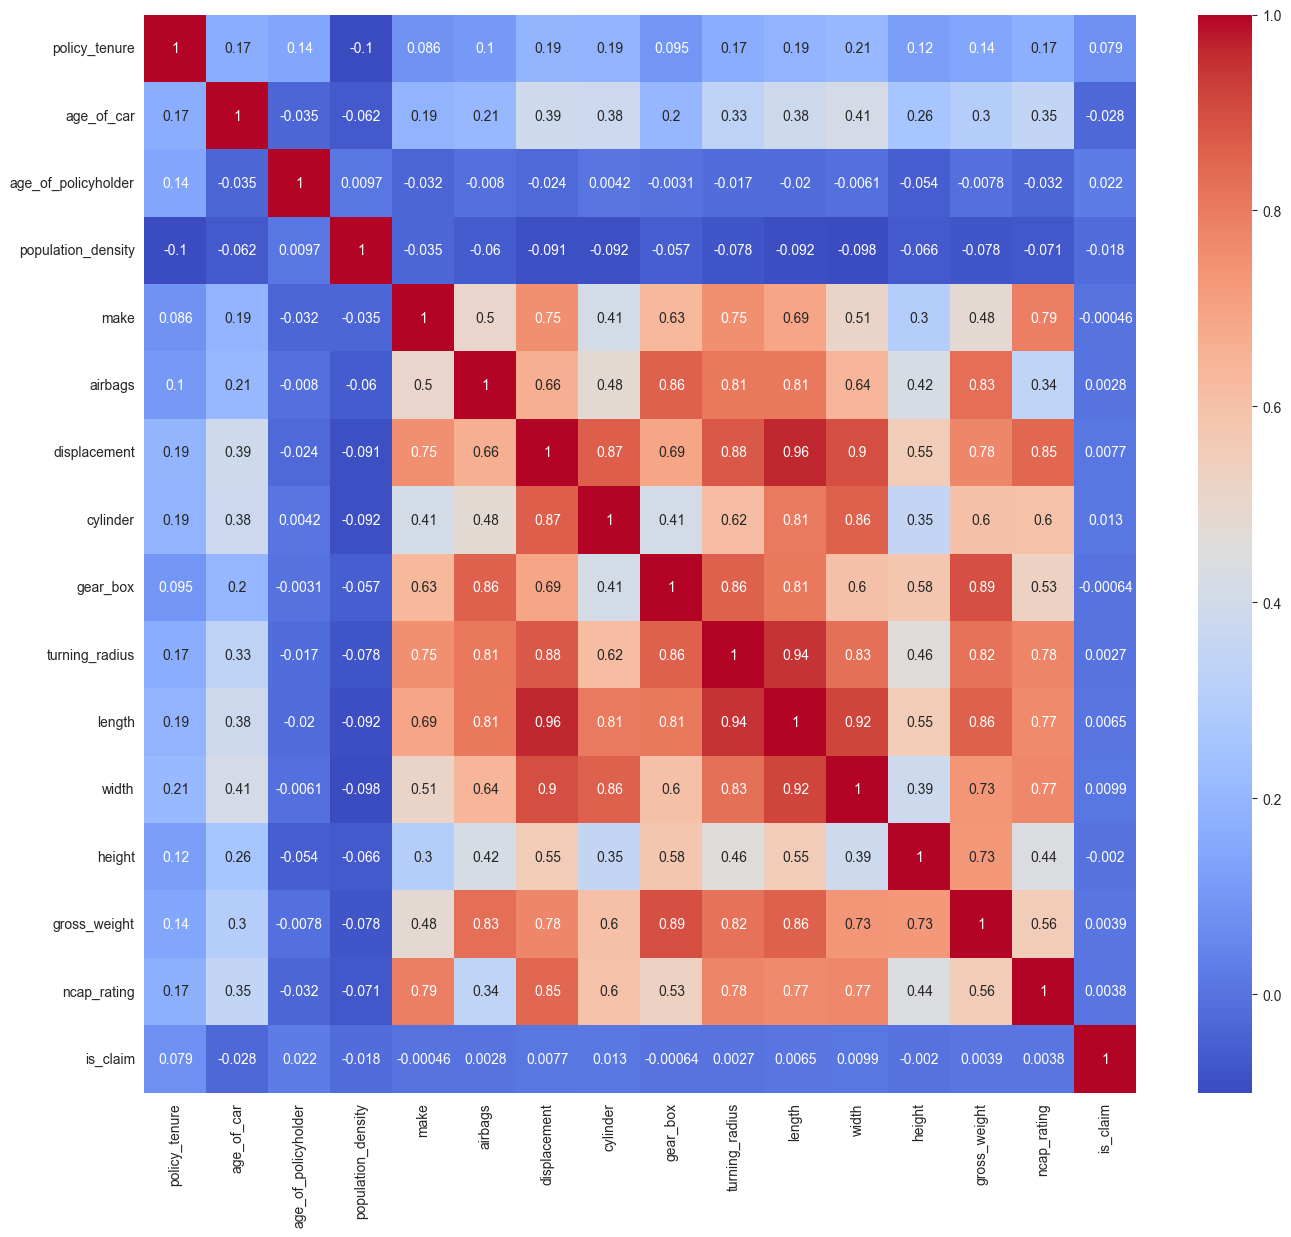

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_dt = dt.select_dtypes(include=['number'])

# Calculate the correlation matrix.
correlation_matrix = numeric_dt.corr()

# Creating the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


Strong Positive Relationships:

1)The attributes related to the physical dimensions and engine characteristics of a car (displacement, cylinder, gear_box, turning_radius, length, width, height, and gross_weight) show very strong positive correlations with each other. This is expected since larger cars will generally have larger engines, more cylinders, and greater overall dimensions.


2)age_of_car and age_of_policyholder have a relatively high positive correlation. This might indicate that older policyholders tend to own older cars, or it could be reflective of a certain demographic's preference or car ownership patterns.

Negative Relationships:

The correlation between population_density and several car attributes such as displacement, cylinder, and gross_weight is negative, though not very strong. It might suggest that people in more densely populated areas prefer smaller, less powerful cars, possibly due to space and efficiency considerations.